<a href="https://colab.research.google.com/github/drwitt/BME_590_Tensorflow_Deep_Learning/blob/master/Example_Visualization_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install tensorflow_datasets
!pip3 install tensorflow-gpu==2.0.0-rc0
!pip3 install array2gif

In [0]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
dataset = tfds.load('oxford_iiit_pet')

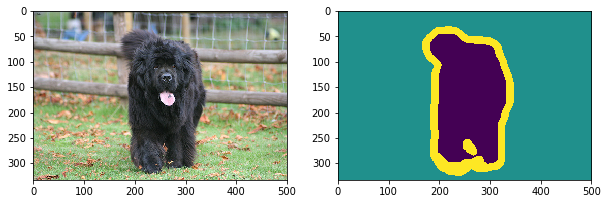

In [0]:
for x in dataset['train']: break
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(x['image'])
axs[1].imshow(np.squeeze(x['segmentation_mask']))

In [0]:
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

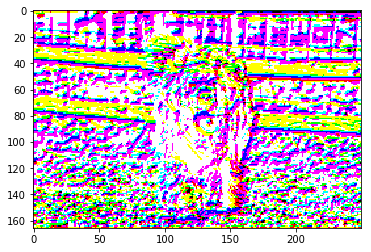

In [0]:
import tensorflow.keras.backend as K
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# with a Sequential model
get_int_layer_output = K.function([vgg16.layers[0].input],
                                  [vgg16.layers[4].output])

my_input = tf.keras.applications.vgg16.preprocess_input(x['image'].numpy()[None, :, :, :])
layer_output = get_int_layer_output([my_input])
plt.imshow(np.squeeze(layer_output[0])[:,:,8:11])

In [0]:
my_list = []
output = np.squeeze(layer_output[0])

for i in range(layer_output[0].shape[-1]):
  val = output[:,:,i]
  val = (255*(val - val.min())/(val.max() - val.min())).astype('uint8')
  my_list.append(np.stack((val, val, val), axis=-1))

In [0]:
from array2gif import write_gif
write_gif(my_list, 'test.gif', fps=5)